In [1]:
import uproot
import pandas as pd
import numpy as np
import awkward as ak

In [2]:
sig = uproot.open('/Users/chawla19/Topbjets/Bdecays/Parameterization/minitree_ttbarbdecays_UL2018.root:tree1')
bkg = uproot.open('/Users/chawla19/Topbjets/Bdecays/Parameterization/minitree_ttbarbdecays_UL2018.root:tree2')

In [3]:
sig_df = sig.arrays(("lxy_D0","lxysig_D0","ct_D0","chi2_D0","mass_lepD0"), library="pd")
sig_df = sig_df.reset_index(level='subentry', drop=True)
sig_df = sig_df.reset_index(level='entry', drop=True)
sig_df = sig_df.sample(frac=0.07)
sig_df = sig_df.reset_index(drop=True)
#sig_df.max()
sig_df

lxy_D0  lxysig_D0     ct_D0   chi2_D0  mass_lepD0
0     0.670903  14.436753  0.017079  0.027892    3.551404
1     1.395445  73.117034  0.092585  1.956109    2.576072
2     0.173674  12.669474  0.015388  0.079758    4.431951
3     0.281282  20.195161  0.026339  0.090090    4.305680
4     0.859336  41.651910  0.061064  0.628348    3.370762
...        ...        ...       ...       ...         ...
7035  0.476635  31.964809  0.116556  1.341466    2.601008
7036  0.455052  16.248980  0.027533  1.277679    3.238435
7037  0.506383  32.972115  0.057794  0.155747    4.006147
7038  0.247526  16.285332  0.037071  2.052320    2.944777
7039  0.396926  15.890778  0.018470  0.066905    4.138038

[7040 rows x 5 columns]

In [4]:
bkg_df = bkg.arrays(("lxy_D0","lxysig_D0","ct_D0","chi2_D0","mass_lepD0"), library="pd")
bkg_df = bkg_df.reset_index(level='subentry', drop=True)
bkg_df = bkg_df.reset_index(level='entry', drop=True)
bkg_df = bkg_df[bkg_df["chi2_D0"] < 100]
bkg_df = bkg_df[bkg_df["mass_lepD0"] < 6]
#bkg_df.max()
bkg_df

lxy_D0  lxysig_D0     ct_D0   chi2_D0  mass_lepD0
0     0.078366   6.272902  0.021942  0.514307    3.701266
1     0.930197  35.595523  0.035928  2.352106    3.764705
2     0.089415   4.602728  0.008202  4.586267    4.301862
3     0.148472   9.221735  0.043513  2.412991    4.125004
4     1.298763  12.770316  0.029474  4.584049    3.822619
...        ...        ...       ...       ...         ...
6465  0.617950  19.156408  0.042210  5.340754    3.598716
6466  3.674790  93.965042  0.082737  2.925556    4.711404
6467  1.585658  52.345989  0.042120  1.525227    2.814587
6468  0.818384  11.591967  0.017382  7.038860    4.403218
6469  1.559530  76.640988  0.133801  0.578714    3.506479

[6442 rows x 5 columns]

In [5]:
df = pd.concat([sig_df, bkg_df], ignore_index=True)
df

lxy_D0  lxysig_D0     ct_D0   chi2_D0  mass_lepD0
0      0.670903  14.436753  0.017079  0.027892    3.551404
1      1.395445  73.117034  0.092585  1.956109    2.576072
2      0.173674  12.669474  0.015388  0.079758    4.431951
3      0.281282  20.195161  0.026339  0.090090    4.305680
4      0.859336  41.651910  0.061064  0.628348    3.370762
...         ...        ...       ...       ...         ...
13477  0.617950  19.156408  0.042210  5.340754    3.598716
13478  3.674790  93.965042  0.082737  2.925556    4.711404
13479  1.585658  52.345989  0.042120  1.525227    2.814587
13480  0.818384  11.591967  0.017382  7.038860    4.403218
13481  1.559530  76.640988  0.133801  0.578714    3.506479

[13482 rows x 5 columns]

In [6]:
mean = df.mean()
std = df.std()
df_par = (df - mean)/std
df_par

lxy_D0  lxysig_D0     ct_D0   chi2_D0  mass_lepD0
0     -0.113243  -0.526996 -0.677411 -0.566965   -0.102974
1      0.739035   0.910226  0.890570  0.057765   -1.561743
2     -0.698133  -0.570281 -0.712538 -0.550160    1.214029
3     -0.571554  -0.385958 -0.485130 -0.546813    1.025170
4      0.108410   0.139569  0.235988 -0.372421   -0.373154
...         ...        ...       ...       ...         ...
13477 -0.175532  -0.411400 -0.155549  1.154368   -0.032211
13478  3.420227   1.420845  0.686059  0.371860    1.631997
13479  0.962782   0.401493 -0.157416 -0.081838   -1.205005
13480  0.060239  -0.596671 -0.671116  1.704544    1.171054
13481  0.932048   0.996537  1.746456 -0.388502   -0.170167

[13482 rows x 5 columns]

In [7]:
sig_label = np.ones(len(sig_df.values))
bkg_label = np.zeros(len(bkg_df.values))
label = np.concatenate([sig_label,bkg_label])
df_par['label'] = label

In [8]:
df_par

lxy_D0  lxysig_D0     ct_D0   chi2_D0  mass_lepD0  label
0     -0.113243  -0.526996 -0.677411 -0.566965   -0.102974    1.0
1      0.739035   0.910226  0.890570  0.057765   -1.561743    1.0
2     -0.698133  -0.570281 -0.712538 -0.550160    1.214029    1.0
3     -0.571554  -0.385958 -0.485130 -0.546813    1.025170    1.0
4      0.108410   0.139569  0.235988 -0.372421   -0.373154    1.0
...         ...        ...       ...       ...         ...    ...
13477 -0.175532  -0.411400 -0.155549  1.154368   -0.032211    0.0
13478  3.420227   1.420845  0.686059  0.371860    1.631997    0.0
13479  0.962782   0.401493 -0.157416 -0.081838   -1.205005    0.0
13480  0.060239  -0.596671 -0.671116  1.704544    1.171054    0.0
13481  0.932048   0.996537  1.746456 -0.388502   -0.170167    0.0

[13482 rows x 6 columns]

In [9]:
df_par = df_par.sample(frac=1)

In [10]:
df_par

lxy_D0  lxysig_D0     ct_D0   chi2_D0  mass_lepD0  label
1662 -0.571071  -0.612346 -0.790261  0.689863   -0.238708    1.0
8452 -0.686684  -0.636481 -0.413002 -0.219160    1.548067    0.0
5787  1.890671   1.520111  0.397828  1.468449   -1.602725    1.0
6109  0.893331  -0.049707 -0.210448 -0.485837    1.591175    1.0
6818 -0.623988  -0.410121 -0.569007 -0.279901    1.034156    1.0
...        ...        ...       ...       ...         ...    ...
5931 -0.832260  -0.815196 -0.925865  0.468824   -0.307444    1.0
7160  0.932130   0.205539 -0.143465  3.060865   -0.261280    0.0
661  -0.381185  -0.104431  0.275993 -0.207982    0.494601    1.0
8543  0.341739   0.670453  0.542625  0.154171   -2.039739    0.0
6513 -0.249787  -0.369119 -0.421006 -0.492861    0.467444    1.0

[13482 rows x 6 columns]

In [11]:
train_len = int(0.5*len(df_par))
df_train = df_par[0:train_len]
df_test = df_par[train_len:]

In [12]:
df_train

lxy_D0  lxysig_D0     ct_D0   chi2_D0  mass_lepD0  label
1662  -0.571071  -0.612346 -0.790261  0.689863   -0.238708    1.0
8452  -0.686684  -0.636481 -0.413002 -0.219160    1.548067    0.0
5787   1.890671   1.520111  0.397828  1.468449   -1.602725    1.0
6109   0.893331  -0.049707 -0.210448 -0.485837    1.591175    1.0
6818  -0.623988  -0.410121 -0.569007 -0.279901    1.034156    1.0
...         ...        ...       ...       ...         ...    ...
235    0.415196   1.177199  2.428940  0.136125   -0.234105    1.0
12535  1.977857   0.883329  0.217490  1.144938   -1.372488    0.0
2282  -0.693240  -0.257810 -0.400420 -0.561228    0.943214    1.0
7915   0.491367  -0.638179  0.613560  0.458791    0.223951    0.0
12283 -0.781570  -0.715264 -0.836733 -0.536773   -0.494111    0.0

[6741 rows x 6 columns]

In [13]:
df_test

lxy_D0  lxysig_D0     ct_D0    chi2_D0  mass_lepD0  label
3260  -0.099353  -0.015785 -0.130612  -0.252853    0.244376    1.0
6128   0.797559   2.505467  3.160521   0.945766   -0.300378    1.0
8066  -0.224370  -0.673226 -0.880597  -0.382100    0.255413    0.0
8304  -0.519535  -0.499459 -0.421560  -0.557552    0.859869    0.0
13003  0.444355   1.883506  1.509065  11.386097   -0.112742    0.0
...         ...        ...       ...        ...         ...    ...
5931  -0.832260  -0.815196 -0.925865   0.468824   -0.307444    1.0
7160   0.932130   0.205539 -0.143465   3.060865   -0.261280    0.0
661   -0.381185  -0.104431  0.275993  -0.207982    0.494601    1.0
8543   0.341739   0.670453  0.542625   0.154171   -2.039739    0.0
6513  -0.249787  -0.369119 -0.421006  -0.492861    0.467444    1.0

[6741 rows x 6 columns]

In [14]:
#x_train = df_train[["lxy_D0","lxysig_D0","ct_D0","chi2_D0","mass_lepD0"]]
#y_train = df_train["label"]
x_train = df_train.iloc[:,0:5]
y_train = df_train.iloc[:,5]

In [15]:
x_train

lxy_D0  lxysig_D0     ct_D0   chi2_D0  mass_lepD0
1662  -0.571071  -0.612346 -0.790261  0.689863   -0.238708
8452  -0.686684  -0.636481 -0.413002 -0.219160    1.548067
5787   1.890671   1.520111  0.397828  1.468449   -1.602725
6109   0.893331  -0.049707 -0.210448 -0.485837    1.591175
6818  -0.623988  -0.410121 -0.569007 -0.279901    1.034156
...         ...        ...       ...       ...         ...
235    0.415196   1.177199  2.428940  0.136125   -0.234105
12535  1.977857   0.883329  0.217490  1.144938   -1.372488
2282  -0.693240  -0.257810 -0.400420 -0.561228    0.943214
7915   0.491367  -0.638179  0.613560  0.458791    0.223951
12283 -0.781570  -0.715264 -0.836733 -0.536773   -0.494111

[6741 rows x 5 columns]

In [16]:
y_train

1662     1.0
8452     0.0
5787     1.0
6109     1.0
6818     1.0
        ... 
235      1.0
12535    0.0
2282     1.0
7915     0.0
12283    0.0
Name: label, Length: 6741, dtype: float64

In [18]:
from keras.models import Sequential
from keras.layers import Dense, Dropout

model = Sequential()
model.add(Dense(5, input_shape=(5,), activation='relu')) #input layer
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid')) #output layer
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 5)                 30        
                                                                 
 dropout_1 (Dropout)         (None, 5)                 0         
                                                                 
 dense_3 (Dense)             (None, 1)                 6         
                                                                 
Total params: 36
Trainable params: 36
Non-trainable params: 0
_________________________________________________________________


In [19]:
hist = model.fit(x_train, y_train, batch_size=50, epochs=10, verbose=1, shuffle=True, validation_split=0.20)

Epoch 1/10
108/108 [==============================] - 1s 2ms/step - loss: 0.7513 - accuracy: 0.5536 - val_loss: 0.7140 - val_accuracy: 0.5604
Epoch 2/10
108/108 [==============================] - 0s 1ms/step - loss: 0.7095 - accuracy: 0.5651 - val_loss: 0.6910 - val_accuracy: 0.5671
Epoch 3/10
108/108 [==============================] - 0s 1ms/step - loss: 0.6918 - accuracy: 0.5690 - val_loss: 0.6813 - val_accuracy: 0.5819
Epoch 4/10
108/108 [==============================] - 0s 1ms/step - loss: 0.6867 - accuracy: 0.5705 - val_loss: 0.6767 - val_accuracy: 0.5849
Epoch 5/10
108/108 [==============================] - 0s 1ms/step - loss: 0.6814 - accuracy: 0.5772 - val_loss: 0.6726 - val_accuracy: 0.5849
Epoch 6/10
108/108 [==============================] - 0s 1ms/step - loss: 0.6789 - accuracy: 0.5751 - val_loss: 0.6710 - val_accuracy: 0.5901
Epoch 7/10
108/108 [==============================] - 0s 1ms/step - loss: 0.6798 - accuracy: 0.5757 - val_loss: 0.6695 - val_accuracy: 0.5990
Epoch 

In [20]:
import matplotlib.pyplot as plt
def show_losses(histories):
    plt.figure(figsize=(5,5))
    plt.xlabel('Epoch', fontsize=12)
    plt.ylabel('Loss' , fontsize=12)
    plt.tick_params(axis="y", labelsize=12)
    plt.tick_params(axis="x", labelsize=12)
    plt.title('Cross Entropy Loss by Epoch', fontsize=10)
    color='C0'
    do_acc=False
    for label,loss in histories:
        #color = tuple(np.random.random(3))
        #colors.append(color)
        l = 'Training set loss'
        vl= 'Validation set loss'
        if 'accuracy' in loss.history:
            l+=' (acc %2.4f)'% (loss.history['accuracy'][-1])
            do_acc = True
        if 'val_accuracy' in loss.history:
            vl+=' (val acc %2.4f)'% (loss.history['val_accuracy'][-1])
            do_acc = True
        plt.plot(loss.history['loss'], label=l, color='C0')
        if 'val_loss' in loss.history:
            plt.plot(loss.history['val_loss'], lw=2, ls='dashed', label=vl, color='C0')

    plt.legend(fontsize=9)
    #plt.yscale('log')
    plt.show()
    
    if not do_acc: return
    plt.figure(figsize=(5,5))
    plt.xlabel('Epoch', fontsize=12)
    plt.ylabel('Accuracy' , fontsize=12)
    plt.tick_params(axis="y", labelsize=12)
    plt.tick_params(axis="x", labelsize=12)
    for i,(label,loss) in enumerate(histories):
        #color = colors[i]
        if 'accuracy' in loss.history:
            plt.plot(loss.history['accuracy'], lw=2, label=label+" accuracy", color=color)
        if 'val_accuracy' in loss.history:
            plt.plot(loss.history['val_accuracy'], lw=2, ls='dashed', label=label+" validation accuracy", color=color)
    plt.legend(fontsize=9)
    plt.show()

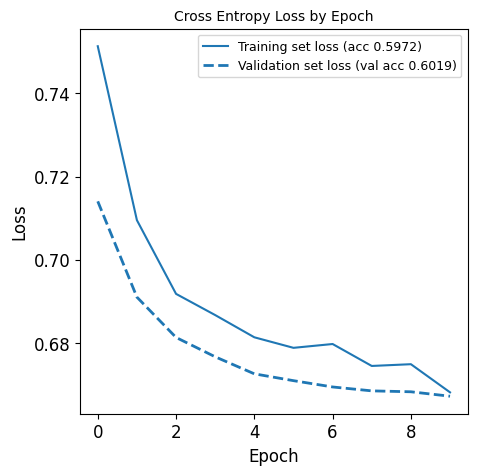

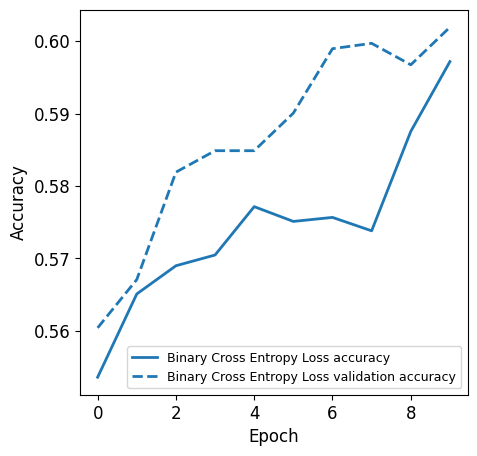

In [21]:
show_losses([("Binary Cross Entropy Loss", hist)])

In [22]:
sig_train = df_train[df_train["label"] == 1].iloc[:,0:5]
bkg_train = df_train[df_train["label"] == 0].iloc[:,0:5]
sig_test = df_test[df_test["label"] == 1].iloc[:,0:5]
bkg_test = df_test[df_test["label"] == 0].iloc[:,0:5]

In [25]:
sig_pred = model.predict(sig_train)
bkg_pred = model.predict(bkg_train)

101/101 [==============================] - 0s 627us/step


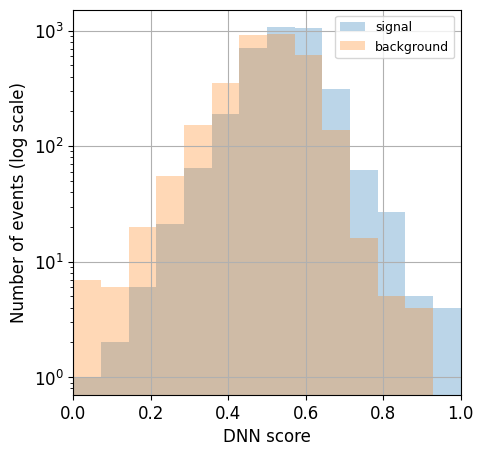

In [26]:
binning = np.linspace(0,1,15)
plt.figure(figsize=(5,5))
plt.tick_params(axis="y", labelsize=12)
plt.tick_params(axis="x", labelsize=12)
plt.hist(sig_pred, bins=binning, alpha=0.3, label='signal')
plt.hist(bkg_pred, bins=binning, alpha=0.3, label='background')
plt.yscale('log')
plt.xlim(0,1)
plt.xlabel('DNN score', fontsize=12)
plt.ylabel('Number of events (log scale)', fontsize=12)
plt.grid()
plt.legend(loc='best', fontsize=9)